In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import folium

In [2]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(6405008, 18)

In [4]:
df_sample= df.sample(n = 1000000)

In [5]:
df_sample

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
223440,2.0,2020-01-02 12:31:02,2020-01-02 12:42:13,1.0,0.89,1.0,N,170,164,1.0,8.5,0.0,0.5,1.60,0.0,0.3,13.40,2.5
1602396,1.0,2020-01-09 18:14:26,2020-01-09 18:26:08,1.0,0.80,1.0,N,162,48,1.0,8.5,3.5,0.5,3.20,0.0,0.3,16.00,2.5
3461836,2.0,2020-01-18 10:14:28,2020-01-18 10:43:00,2.0,1.68,1.0,N,162,163,1.0,16.5,0.0,0.5,3.96,0.0,0.3,23.76,2.5
854287,2.0,2020-01-05 23:36:46,2020-01-05 23:53:04,1.0,10.49,1.0,N,132,56,1.0,29.0,0.5,0.5,6.06,0.0,0.3,36.36,0.0
4465216,2.0,2020-01-23 14:17:43,2020-01-23 14:36:34,1.0,2.92,1.0,N,161,125,1.0,13.5,0.0,0.5,3.36,0.0,0.3,20.16,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545832,1.0,2020-01-04 09:44:26,2020-01-04 09:55:49,1.0,3.10,1.0,N,236,170,1.0,12.5,2.5,0.5,3.15,0.0,0.3,18.95,2.5
5408206,1.0,2020-01-27 21:23:26,2020-01-27 21:30:05,1.0,1.20,1.0,N,170,237,1.0,6.5,3.0,0.5,2.05,0.0,0.3,12.35,2.5
747009,2.0,2020-01-05 11:25:37,2020-01-05 11:33:48,1.0,1.36,1.0,N,68,137,1.0,7.5,0.0,0.5,2.16,0.0,0.3,12.96,2.5
2157535,1.0,2020-01-12 09:33:50,2020-01-12 09:36:11,1.0,0.50,1.0,N,263,262,1.0,4.0,2.5,0.5,2.15,0.0,0.3,9.45,2.5


In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 223440 to 4391652
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               989503 non-null   float64
 1   tpep_pickup_datetime   1000000 non-null  object 
 2   tpep_dropoff_datetime  1000000 non-null  object 
 3   passenger_count        989503 non-null   float64
 4   trip_distance          1000000 non-null  float64
 5   RatecodeID             989503 non-null   float64
 6   store_and_fwd_flag     989503 non-null   object 
 7   PULocationID           1000000 non-null  int64  
 8   DOLocationID           1000000 non-null  int64  
 9   payment_type           989503 non-null   float64
 10  fare_amount            1000000 non-null  float64
 11  extra                  1000000 non-null  float64
 12  mta_tax                1000000 non-null  float64
 13  tip_amount             1000000 non-null  float64
 14  tolls_amount 

In [7]:
sample_train, sample_test = train_test_split(df_sample, test_size=0.2,random_state=0)

In [8]:
sample_test.shape

(200000, 18)

In [9]:
sample_train, sample_val = train_test_split(sample_train, test_size=0.25,random_state=0)

In [10]:
sample_val.shape

(200000, 18)

In [11]:
sample_train.shape

(600000, 18)

In [12]:
sample_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4537702,1.0,2020-01-23 19:09:45,2020-01-23 19:19:06,2.0,1.30,1.0,N,90,48,1.0,8.0,3.5,0.5,2.45,0.0,0.3,14.75,2.5
4466391,2.0,2020-01-23 14:10:36,2020-01-23 14:21:06,1.0,1.61,1.0,N,24,75,1.0,9.0,0.0,0.5,4.50,0.0,0.3,14.30,0.0
1884969,2.0,2020-01-10 23:44:26,2020-01-11 00:07:41,1.0,4.95,1.0,N,170,25,1.0,19.0,0.5,0.5,5.70,0.0,0.3,28.50,2.5
5632598,2.0,2020-01-28 23:08:31,2020-01-28 23:19:02,2.0,1.89,1.0,N,142,236,1.0,10.0,0.5,0.5,2.76,0.0,0.3,16.56,2.5
2297618,2.0,2020-01-13 03:51:10,2020-01-13 03:53:53,1.0,0.77,1.0,N,232,4,2.0,4.5,0.5,0.5,0.00,0.0,0.3,8.30,2.5


In [13]:
dfـPULocation = pd.read_csv('PULocation_lon_lat.cvs')

In [14]:
dfـPULocation

,Unnamed: 0,PULocation_lon,PULocation_lat,PULocationID
0,0,-74.174000,40.691831,1
1,1,-73.831299,40.616745,2
2,2,-73.847422,40.864474,3
3,3,-73.976968,40.723752,4
4,4,-74.188484,40.552659,5
...,...,...,...,...
258,258,-73.959905,40.710880,256
259,259,-73.852215,40.897932,259
260,260,-73.906306,40.744235,260
261,261,-74.013023,40.709139,261


In [15]:
dfـPULocation.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
sample_train = pd.merge(sample_train,dfـPULocation, on='PULocationID')
sample_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat
0,1.0,2020-01-23 19:09:45,2020-01-23 19:19:06,2.0,1.30,1.0,N,90,48,1.0,8.00,3.50,0.5,2.45,0.00,0.3,14.75,2.5,-73.996971,40.742279
1,2.0,2020-01-03 12:11:03,2020-01-03 12:19:13,5.0,1.18,1.0,N,90,158,1.0,7.00,0.00,0.5,2.06,0.00,0.3,12.36,2.5,-73.996971,40.742279
2,1.0,2020-01-14 10:14:34,2020-01-14 10:20:40,1.0,0.90,1.0,N,90,107,1.0,5.50,2.50,0.5,1.75,0.00,0.3,10.55,2.5,-73.996971,40.742279
3,2.0,2020-01-31 19:30:02,2020-01-31 19:43:09,1.0,1.70,1.0,N,90,125,2.0,10.00,1.00,0.5,0.00,0.00,0.3,14.30,2.5,-73.996971,40.742279
4,2.0,2020-01-22 08:53:36,2020-01-22 09:11:39,2.0,2.57,1.0,N,90,209,1.0,13.00,0.00,0.5,1.63,0.00,0.3,17.93,2.5,-73.996971,40.742279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595651,NaN,2020-01-09 21:47:00,2020-01-09 22:20:00,NaN,19.82,NaN,NaN,44,26,NaN,60.21,2.75,0.5,0.00,12.24,0.3,76.00,0.0,-74.233534,40.525495
595652,2.0,2020-01-31 11:21:54,2020-01-31 11:40:17,1.0,11.20,1.0,N,44,23,1.0,32.50,0.00,0.5,0.00,0.00,0.3,33.30,0.0,-74.233534,40.525495
595653,2.0,2020-01-05 04:04:37,2020-01-05 04:04:42,1.0,0.02,5.0,N,44,44,2.0,90.00,0.00,0.0,0.00,0.00,0.3,90.30,0.0,-74.233534,40.525495
595654,2.0,2020-01-25 13:53:05,2020-01-26 13:49:16,1.0,2.99,1.0,N,221,14,1.0,9.50,0.00,0.5,0.00,0.00,0.3,10.30,0.0,-74.073704,40.618769


In [17]:
sample_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3100965,1.0,2020-01-16 19:24:39,2020-01-16 19:28:34,0.0,0.90,1.0,N,148,79,1.0,5.0,3.5,0.5,1.85,0.00,0.3,11.15,2.5
2600621,2.0,2020-01-14 14:18:01,2020-01-14 14:46:40,1.0,7.33,2.0,N,194,142,1.0,52.0,0.0,0.5,12.28,6.12,0.3,73.70,2.5
4392584,1.0,2020-01-23 08:07:37,2020-01-23 08:20:08,1.0,0.80,1.0,N,75,236,1.0,9.0,2.5,0.5,3.65,0.00,0.3,15.95,2.5
4297852,2.0,2020-01-22 18:03:25,2020-01-22 18:07:51,5.0,0.20,1.0,N,234,234,1.0,4.5,1.0,0.5,1.76,0.00,0.3,10.56,2.5
966827,2.0,2020-01-06 17:04:02,2020-01-06 17:06:12,1.0,0.40,1.0,N,142,163,2.0,3.5,1.0,0.5,0.00,0.00,0.3,7.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918098,1.0,2020-01-06 12:49:29,2020-01-06 12:56:08,1.0,0.80,1.0,N,163,162,1.0,6.0,2.5,0.5,1.85,0.00,0.3,11.15,2.5
5739137,2.0,2020-01-29 14:19:38,2020-01-29 14:25:42,1.0,1.20,1.0,N,43,43,1.0,6.5,0.0,0.5,2.45,0.00,0.3,12.25,2.5
5134626,2.0,2020-01-26 13:31:30,2020-01-26 13:37:53,1.0,0.86,1.0,N,234,137,1.0,6.0,0.0,0.5,2.79,0.00,0.3,12.09,2.5
6147190,1.0,2020-01-31 08:51:28,2020-01-31 09:00:26,1.0,1.10,1.0,N,107,164,1.0,7.5,2.5,0.5,1.40,0.00,0.3,12.20,2.5


In [18]:
sample_val = pd.merge(sample_val,dfـPULocation, on='PULocationID')
sample_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat
0,1.0,2020-01-16 19:24:39,2020-01-16 19:28:34,0.0,0.90,1.0,N,148,79,1.0,5.00,3.50,0.5,1.85,0.0,0.3,11.15,2.5,-73.990896,40.718938
1,1.0,2020-01-26 02:34:10,2020-01-26 02:45:18,1.0,3.00,1.0,N,148,229,1.0,11.50,3.00,0.5,1.00,0.0,0.3,16.30,2.5,-73.990896,40.718938
2,1.0,2020-01-12 05:16:18,2020-01-12 05:23:23,1.0,1.40,1.0,N,148,261,1.0,7.00,3.00,0.5,1.00,0.0,0.3,11.80,2.5,-73.990896,40.718938
3,2.0,2020-01-05 19:41:15,2020-01-05 20:02:35,2.0,4.50,1.0,N,148,17,2.0,18.00,0.00,0.5,0.00,0.0,0.3,21.30,2.5,-73.990896,40.718938
4,2.0,2020-01-27 22:57:51,2020-01-27 23:03:46,3.0,1.17,1.0,N,148,113,1.0,6.00,0.50,0.5,2.45,0.0,0.3,12.25,2.5,-73.990896,40.718938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198501,1.0,2020-01-01 20:59:38,2020-01-01 21:36:50,1.0,0.00,1.0,N,53,179,1.0,26.20,0.00,0.5,0.00,0.0,0.3,27.00,0.0,-73.842813,40.780912
198502,NaN,2020-01-18 13:12:00,2020-01-18 13:33:00,NaN,6.85,NaN,NaN,53,9,NaN,18.11,2.75,0.5,0.00,0.0,0.3,21.66,0.0,-73.842813,40.780912
198503,2.0,2020-01-12 17:03:19,2020-01-12 17:37:55,1.0,12.67,1.0,N,115,23,1.0,38.00,0.00,0.5,0.00,0.0,0.3,38.80,0.0,-74.087839,40.617971
198504,2.0,2020-01-25 14:13:13,2020-01-25 14:13:17,2.0,0.04,1.0,N,253,253,2.0,2.50,0.00,0.5,0.00,0.0,0.3,3.30,0.0,-73.841244,40.760631


In [19]:
df_DOLocationID = pd.read_csv('DOLocationID_lon_lat.cvs')

In [20]:
df_DOLocationID

,Unnamed: 0,DOLocationID_lon,DOLocationID_lat,DOLocationID
0,0,-74.174000,40.691831,1
1,1,-73.831299,40.616745,2
2,2,-73.847422,40.864474,3
3,3,-73.976968,40.723752,4
4,4,-74.188484,40.552659,5
...,...,...,...,...
258,258,-73.959905,40.710880,256
259,259,-73.852215,40.897932,259
260,260,-73.906306,40.744235,260
261,261,-74.013023,40.709139,261


In [21]:
df_DOLocationID.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
sample_train = pd.merge(sample_train,df_DOLocationID, on='DOLocationID')
sample_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat
0,1.0,2020-01-23 19:09:45,2020-01-23 19:19:06,2.0,1.30,1.0,N,90,48,1.0,...,0.5,2.45,0.00,0.3,14.75,2.5,-73.996971,40.742279,-73.989845,40.762253
1,2.0,2020-01-31 19:10:55,2020-01-31 19:22:22,5.0,1.31,1.0,N,90,48,1.0,...,0.5,2.66,0.00,0.3,15.96,2.5,-73.996971,40.742279,-73.989845,40.762253
2,2.0,2020-01-11 19:26:38,2020-01-11 19:50:07,1.0,2.08,1.0,N,90,48,1.0,...,0.5,1.00,0.00,0.3,19.80,2.5,-73.996971,40.742279,-73.989845,40.762253
3,2.0,2020-01-09 05:18:41,2020-01-09 05:24:56,2.0,2.15,1.0,N,90,48,1.0,...,0.5,2.36,0.00,0.3,14.16,2.5,-73.996971,40.742279,-73.989845,40.762253
4,2.0,2020-01-15 15:46:32,2020-01-15 16:01:27,1.0,1.74,1.0,N,90,48,1.0,...,0.5,1.80,0.00,0.3,15.60,2.5,-73.996971,40.742279,-73.989845,40.762253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593718,2.0,2020-01-31 18:17:28,2020-01-31 19:22:32,1.0,21.50,1.0,N,249,109,2.0,...,0.5,0.00,18.36,0.3,88.66,2.5,-74.002875,40.734576,-74.150890,40.551863
593719,2.0,2020-01-10 00:48:09,2020-01-10 01:44:43,1.0,21.45,1.0,N,114,109,1.0,...,0.5,8.00,12.24,0.3,88.04,2.5,-73.997380,40.728340,-74.150890,40.551863
593720,2.0,2020-01-24 00:11:49,2020-01-24 01:35:34,1.0,31.09,1.0,N,158,204,2.0,...,0.5,0.00,12.24,0.3,110.04,2.5,-74.008984,40.735035,-74.207826,40.540334
593721,2.0,2020-01-20 18:33:27,2020-01-20 19:11:10,1.0,27.23,1.0,N,246,204,2.0,...,0.5,0.00,30.50,0.3,105.80,2.5,-74.004015,40.753309,-74.207826,40.540334


In [23]:
sample_val = pd.merge(sample_val,df_DOLocationID, on='DOLocationID')
sample_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat
0,1.0,2020-01-16 19:24:39,2020-01-16 19:28:34,0.0,0.90,1.0,N,148,79,1.0,...,0.5,1.85,0.00,0.3,11.15,2.5,-73.990896,40.718938,-73.985937,40.727620
1,2.0,2020-01-25 23:19:03,2020-01-25 23:25:21,3.0,0.76,1.0,N,148,79,1.0,...,0.5,1.96,0.00,0.3,11.76,2.5,-73.990896,40.718938,-73.985937,40.727620
2,2.0,2020-01-18 15:33:52,2020-01-18 15:38:32,1.0,0.57,1.0,N,148,79,2.0,...,0.5,0.00,0.00,0.3,8.30,2.5,-73.990896,40.718938,-73.985937,40.727620
3,2.0,2020-01-25 01:25:41,2020-01-25 01:33:37,4.0,1.21,1.0,N,148,79,1.0,...,0.5,2.16,0.00,0.3,12.96,2.5,-73.990896,40.718938,-73.985937,40.727620
4,2.0,2020-01-29 00:34:16,2020-01-29 00:38:24,2.0,0.90,1.0,N,148,79,1.0,...,0.5,1.00,0.00,0.3,10.30,2.5,-73.990896,40.718938,-73.985937,40.727620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197818,1.0,2020-01-16 23:32:44,2020-01-17 00:03:21,1.0,20.80,1.0,N,138,221,1.0,...,0.5,13.90,12.24,0.3,83.44,0.0,-73.873629,40.774376,-74.073704,40.618769
197819,2.0,2020-01-31 11:55:43,2020-01-31 12:34:06,1.0,21.80,1.0,N,138,221,2.0,...,0.5,0.00,12.24,0.3,72.04,0.0,-73.873629,40.774376,-74.073704,40.618769
197820,2.0,2020-01-31 11:35:25,2020-01-31 12:20:11,1.0,23.91,1.0,N,95,221,1.0,...,0.5,0.00,12.24,0.3,81.99,0.0,-73.847669,40.721432,-74.073704,40.618769
197821,2.0,2020-01-04 09:14:50,2020-01-04 09:44:49,4.0,16.79,1.0,N,50,115,1.0,...,0.5,0.00,18.36,0.3,68.66,2.5,-73.995135,40.766238,-74.087839,40.617971


In [24]:
sample_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat
0,1.0,2020-01-16 19:24:39,2020-01-16 19:28:34,0.0,0.90,1.0,N,148,79,1.0,...,0.5,1.85,0.0,0.3,11.15,2.5,-73.990896,40.718938,-73.985937,40.72762
1,2.0,2020-01-25 23:19:03,2020-01-25 23:25:21,3.0,0.76,1.0,N,148,79,1.0,...,0.5,1.96,0.0,0.3,11.76,2.5,-73.990896,40.718938,-73.985937,40.72762
2,2.0,2020-01-18 15:33:52,2020-01-18 15:38:32,1.0,0.57,1.0,N,148,79,2.0,...,0.5,0.00,0.0,0.3,8.30,2.5,-73.990896,40.718938,-73.985937,40.72762
3,2.0,2020-01-25 01:25:41,2020-01-25 01:33:37,4.0,1.21,1.0,N,148,79,1.0,...,0.5,2.16,0.0,0.3,12.96,2.5,-73.990896,40.718938,-73.985937,40.72762
4,2.0,2020-01-29 00:34:16,2020-01-29 00:38:24,2.0,0.90,1.0,N,148,79,1.0,...,0.5,1.00,0.0,0.3,10.30,2.5,-73.990896,40.718938,-73.985937,40.72762


In [25]:
sample_train.isnull().sum()

VendorID                 6270
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6270
trip_distance               0
RatecodeID               6270
store_and_fwd_flag       6270
PULocationID                0
DOLocationID                0
payment_type             6270
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
PULocation_lon              0
PULocation_lat              0
DOLocationID_lon            0
DOLocationID_lat            0
dtype: int64

In [26]:
sample_val.isnull().sum()

VendorID                 2188
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2188
trip_distance               0
RatecodeID               2188
store_and_fwd_flag       2188
PULocationID                0
DOLocationID                0
payment_type             2188
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
PULocation_lon              0
PULocation_lat              0
DOLocationID_lon            0
DOLocationID_lat            0
dtype: int64

In [27]:
sample_train.dropna(inplace=True)

In [28]:
sample_val.dropna(inplace=True)

In [29]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587453 entries, 0 to 593722
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               587453 non-null  float64
 1   tpep_pickup_datetime   587453 non-null  object 
 2   tpep_dropoff_datetime  587453 non-null  object 
 3   passenger_count        587453 non-null  float64
 4   trip_distance          587453 non-null  float64
 5   RatecodeID             587453 non-null  float64
 6   store_and_fwd_flag     587453 non-null  object 
 7   PULocationID           587453 non-null  int64  
 8   DOLocationID           587453 non-null  int64  
 9   payment_type           587453 non-null  float64
 10  fare_amount            587453 non-null  float64
 11  extra                  587453 non-null  float64
 12  mta_tax                587453 non-null  float64
 13  tip_amount             587453 non-null  float64
 14  tolls_amount           587453 non-nu

In [30]:
sample_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195635 entries, 0 to 197821
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               195635 non-null  float64
 1   tpep_pickup_datetime   195635 non-null  object 
 2   tpep_dropoff_datetime  195635 non-null  object 
 3   passenger_count        195635 non-null  float64
 4   trip_distance          195635 non-null  float64
 5   RatecodeID             195635 non-null  float64
 6   store_and_fwd_flag     195635 non-null  object 
 7   PULocationID           195635 non-null  int64  
 8   DOLocationID           195635 non-null  int64  
 9   payment_type           195635 non-null  float64
 10  fare_amount            195635 non-null  float64
 11  extra                  195635 non-null  float64
 12  mta_tax                195635 non-null  float64
 13  tip_amount             195635 non-null  float64
 14  tolls_amount           195635 non-nu

In [31]:
sample_train.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
PULocation_lon           0
PULocation_lat           0
DOLocationID_lon         0
DOLocationID_lat         0
dtype: int64

In [32]:
sample_val.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
PULocation_lon           0
PULocation_lat           0
DOLocationID_lon         0
DOLocationID_lat         0
dtype: int64

In [33]:

sample_train['tpep_pickup_datetime']=pd.to_datetime(sample_train['tpep_pickup_datetime'])
sample_train['tpep_dropoff_datetime']=pd.to_datetime(sample_train['tpep_dropoff_datetime'])

In [34]:

sample_val['tpep_pickup_datetime']=pd.to_datetime(sample_val['tpep_pickup_datetime'])
sample_val['tpep_dropoff_datetime']=pd.to_datetime(sample_val['tpep_dropoff_datetime'])

In [35]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587453 entries, 0 to 593722
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               587453 non-null  float64       
 1   tpep_pickup_datetime   587453 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  587453 non-null  datetime64[ns]
 3   passenger_count        587453 non-null  float64       
 4   trip_distance          587453 non-null  float64       
 5   RatecodeID             587453 non-null  float64       
 6   store_and_fwd_flag     587453 non-null  object        
 7   PULocationID           587453 non-null  int64         
 8   DOLocationID           587453 non-null  int64         
 9   payment_type           587453 non-null  float64       
 10  fare_amount            587453 non-null  float64       
 11  extra                  587453 non-null  float64       
 12  mta_tax                587453 non-null  floa

In [36]:
sample_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195635 entries, 0 to 197821
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               195635 non-null  float64       
 1   tpep_pickup_datetime   195635 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  195635 non-null  datetime64[ns]
 3   passenger_count        195635 non-null  float64       
 4   trip_distance          195635 non-null  float64       
 5   RatecodeID             195635 non-null  float64       
 6   store_and_fwd_flag     195635 non-null  object        
 7   PULocationID           195635 non-null  int64         
 8   DOLocationID           195635 non-null  int64         
 9   payment_type           195635 non-null  float64       
 10  fare_amount            195635 non-null  float64       
 11  extra                  195635 non-null  float64       
 12  mta_tax                195635 non-null  floa

In [37]:
sample_train['pickup_day_no']=sample_train['tpep_pickup_datetime'].dt.weekday
sample_train['dropoff_day_no']=sample_train['tpep_dropoff_datetime'].dt.weekday

In [38]:
sample_val['pickup_day_no']=sample_val['tpep_pickup_datetime'].dt.weekday
sample_val['dropoff_day_no']=sample_val['tpep_dropoff_datetime'].dt.weekday

In [39]:
sample_train['pickup_hour']=sample_train['tpep_pickup_datetime'].dt.hour
sample_train['dropoff_hour']=sample_train['tpep_dropoff_datetime'].dt.hour

In [40]:
sample_val['pickup_hour']=sample_val['tpep_pickup_datetime'].dt.hour
sample_val['dropoff_hour']=sample_val['tpep_dropoff_datetime'].dt.hour

In [41]:
sample_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
0,1.0,2020-01-23 19:09:45,2020-01-23 19:19:06,2.0,1.30,1.0,N,90,48,1.0,...,14.75,2.5,-73.996971,40.742279,-73.989845,40.762253,3,3,19,19
1,2.0,2020-01-31 19:10:55,2020-01-31 19:22:22,5.0,1.31,1.0,N,90,48,1.0,...,15.96,2.5,-73.996971,40.742279,-73.989845,40.762253,4,4,19,19
2,2.0,2020-01-11 19:26:38,2020-01-11 19:50:07,1.0,2.08,1.0,N,90,48,1.0,...,19.80,2.5,-73.996971,40.742279,-73.989845,40.762253,5,5,19,19
3,2.0,2020-01-09 05:18:41,2020-01-09 05:24:56,2.0,2.15,1.0,N,90,48,1.0,...,14.16,2.5,-73.996971,40.742279,-73.989845,40.762253,3,3,5,5
4,2.0,2020-01-15 15:46:32,2020-01-15 16:01:27,1.0,1.74,1.0,N,90,48,1.0,...,15.60,2.5,-73.996971,40.742279,-73.989845,40.762253,2,2,15,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593718,2.0,2020-01-31 18:17:28,2020-01-31 19:22:32,1.0,21.50,1.0,N,249,109,2.0,...,88.66,2.5,-74.002875,40.734576,-74.150890,40.551863,4,4,18,19
593719,2.0,2020-01-10 00:48:09,2020-01-10 01:44:43,1.0,21.45,1.0,N,114,109,1.0,...,88.04,2.5,-73.997380,40.728340,-74.150890,40.551863,4,4,0,1
593720,2.0,2020-01-24 00:11:49,2020-01-24 01:35:34,1.0,31.09,1.0,N,158,204,2.0,...,110.04,2.5,-74.008984,40.735035,-74.207826,40.540334,4,4,0,1
593721,2.0,2020-01-20 18:33:27,2020-01-20 19:11:10,1.0,27.23,1.0,N,246,204,2.0,...,105.80,2.5,-74.004015,40.753309,-74.207826,40.540334,0,0,18,19


In [42]:
sample_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
0,1.0,2020-01-16 19:24:39,2020-01-16 19:28:34,0.0,0.90,1.0,N,148,79,1.0,...,11.15,2.5,-73.990896,40.718938,-73.985937,40.727620,3,3,19,19
1,2.0,2020-01-25 23:19:03,2020-01-25 23:25:21,3.0,0.76,1.0,N,148,79,1.0,...,11.76,2.5,-73.990896,40.718938,-73.985937,40.727620,5,5,23,23
2,2.0,2020-01-18 15:33:52,2020-01-18 15:38:32,1.0,0.57,1.0,N,148,79,2.0,...,8.30,2.5,-73.990896,40.718938,-73.985937,40.727620,5,5,15,15
3,2.0,2020-01-25 01:25:41,2020-01-25 01:33:37,4.0,1.21,1.0,N,148,79,1.0,...,12.96,2.5,-73.990896,40.718938,-73.985937,40.727620,5,5,1,1
4,2.0,2020-01-29 00:34:16,2020-01-29 00:38:24,2.0,0.90,1.0,N,148,79,1.0,...,10.30,2.5,-73.990896,40.718938,-73.985937,40.727620,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197816,2.0,2020-01-13 18:07:51,2020-01-13 19:01:28,1.0,17.21,1.0,N,88,156,2.0,...,76.66,2.5,-74.011515,40.703358,-74.167235,40.631308,0,0,18,19
197818,1.0,2020-01-16 23:32:44,2020-01-17 00:03:21,1.0,20.80,1.0,N,138,221,1.0,...,83.44,0.0,-73.873629,40.774376,-74.073704,40.618769,3,4,23,0
197819,2.0,2020-01-31 11:55:43,2020-01-31 12:34:06,1.0,21.80,1.0,N,138,221,2.0,...,72.04,0.0,-73.873629,40.774376,-74.073704,40.618769,4,4,11,12
197820,2.0,2020-01-31 11:35:25,2020-01-31 12:20:11,1.0,23.91,1.0,N,95,221,1.0,...,81.99,0.0,-73.847669,40.721432,-74.073704,40.618769,4,4,11,12


In [43]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [44]:
sample_train['pickup_timeofday']=sample_train['pickup_hour'].apply(time_of_day)
sample_train['dropoff_timeofday']=sample_train['dropoff_hour'].apply(time_of_day)

In [45]:
sample_val['pickup_timeofday']=sample_val['pickup_hour'].apply(time_of_day)
sample_val['dropoff_timeofday']=sample_val['dropoff_hour'].apply(time_of_day)

In [46]:
sample_train.drop('tpep_pickup_datetime', axis=1, inplace=True)
sample_train.drop('tpep_dropoff_datetime', axis=1, inplace=True)

In [47]:
sample_val.drop('tpep_pickup_datetime', axis=1, inplace=True)
sample_val.drop('tpep_dropoff_datetime', axis=1, inplace=True)

In [48]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,1.0,2.0,1.30,1.0,N,90,48,1.0,8.0,3.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,19,19,Evening,Evening
1,2.0,5.0,1.31,1.0,N,90,48,1.0,9.0,1.0,...,-73.996971,40.742279,-73.989845,40.762253,4,4,19,19,Evening,Evening
2,2.0,1.0,2.08,1.0,N,90,48,1.0,15.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,5,5,19,19,Evening,Evening
3,2.0,2.0,2.15,1.0,N,90,48,1.0,8.0,0.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,5,5,Late night,Late night
4,2.0,1.0,1.74,1.0,N,90,48,1.0,10.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,2,2,15,16,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593718,2.0,1.0,21.50,1.0,N,249,109,2.0,66.0,1.0,...,-74.002875,40.734576,-74.150890,40.551863,4,4,18,19,Evening,Evening
593719,2.0,1.0,21.45,1.0,N,114,109,1.0,64.0,0.5,...,-73.997380,40.728340,-74.150890,40.551863,4,4,0,1,Late night,Late night
593720,2.0,1.0,31.09,1.0,N,158,204,2.0,94.0,0.5,...,-74.008984,40.735035,-74.207826,40.540334,4,4,0,1,Late night,Late night
593721,2.0,1.0,27.23,1.0,N,246,204,2.0,72.0,0.0,...,-74.004015,40.753309,-74.207826,40.540334,0,0,18,19,Evening,Evening


In [49]:
sample_val

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,1.0,0.0,0.90,1.0,N,148,79,1.0,5.0,3.5,...,-73.990896,40.718938,-73.985937,40.727620,3,3,19,19,Evening,Evening
1,2.0,3.0,0.76,1.0,N,148,79,1.0,6.0,0.5,...,-73.990896,40.718938,-73.985937,40.727620,5,5,23,23,Late night,Late night
2,2.0,1.0,0.57,1.0,N,148,79,2.0,5.0,0.0,...,-73.990896,40.718938,-73.985937,40.727620,5,5,15,15,Afternoon,Afternoon
3,2.0,4.0,1.21,1.0,N,148,79,1.0,7.0,0.5,...,-73.990896,40.718938,-73.985937,40.727620,5,5,1,1,Late night,Late night
4,2.0,2.0,0.90,1.0,N,148,79,1.0,5.5,0.5,...,-73.990896,40.718938,-73.985937,40.727620,2,2,0,0,Late night,Late night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197816,2.0,1.0,17.21,1.0,N,88,156,2.0,54.0,1.0,...,-74.011515,40.703358,-74.167235,40.631308,0,0,18,19,Evening,Evening
197818,1.0,1.0,20.80,1.0,N,138,221,1.0,56.0,0.5,...,-73.873629,40.774376,-74.073704,40.618769,3,4,23,0,Late night,Late night
197819,2.0,1.0,21.80,1.0,N,138,221,2.0,59.0,0.0,...,-73.873629,40.774376,-74.073704,40.618769,4,4,11,12,Morning,Afternoon
197820,2.0,1.0,23.91,1.0,N,95,221,1.0,67.0,0.0,...,-73.847669,40.721432,-74.073704,40.618769,4,4,11,12,Morning,Afternoon


In [50]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587453 entries, 0 to 593722
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               587453 non-null  float64
 1   passenger_count        587453 non-null  float64
 2   trip_distance          587453 non-null  float64
 3   RatecodeID             587453 non-null  float64
 4   store_and_fwd_flag     587453 non-null  object 
 5   PULocationID           587453 non-null  int64  
 6   DOLocationID           587453 non-null  int64  
 7   payment_type           587453 non-null  float64
 8   fare_amount            587453 non-null  float64
 9   extra                  587453 non-null  float64
 10  mta_tax                587453 non-null  float64
 11  tip_amount             587453 non-null  float64
 12  tolls_amount           587453 non-null  float64
 13  improvement_surcharge  587453 non-null  float64
 14  total_amount           587453 non-nu

In [51]:
sample_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195635 entries, 0 to 197821
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               195635 non-null  float64
 1   passenger_count        195635 non-null  float64
 2   trip_distance          195635 non-null  float64
 3   RatecodeID             195635 non-null  float64
 4   store_and_fwd_flag     195635 non-null  object 
 5   PULocationID           195635 non-null  int64  
 6   DOLocationID           195635 non-null  int64  
 7   payment_type           195635 non-null  float64
 8   fare_amount            195635 non-null  float64
 9   extra                  195635 non-null  float64
 10  mta_tax                195635 non-null  float64
 11  tip_amount             195635 non-null  float64
 12  tolls_amount           195635 non-null  float64
 13  improvement_surcharge  195635 non-null  float64
 14  total_amount           195635 non-nu

In [52]:
sample_train.nunique()

VendorID                    2
passenger_count             9
trip_distance            2815
RatecodeID                  7
store_and_fwd_flag          2
PULocationID              242
DOLocationID              256
payment_type                4
fare_amount               640
extra                      19
mta_tax                     4
tip_amount               1769
tolls_amount              270
improvement_surcharge       3
total_amount             4843
congestion_surcharge        5
PULocation_lon            243
PULocation_lat            243
DOLocationID_lon          257
DOLocationID_lat          257
pickup_day_no               7
dropoff_day_no              7
pickup_hour                24
dropoff_hour               24
pickup_timeofday            4
dropoff_timeofday           4
dtype: int64

In [53]:
sample_val.nunique()

VendorID                    2
passenger_count             7
trip_distance            2475
RatecodeID                  7
store_and_fwd_flag          2
PULocationID              223
DOLocationID              253
payment_type                4
fare_amount               404
extra                      18
mta_tax                     3
tip_amount               1361
tolls_amount              155
improvement_surcharge       3
total_amount             3254
congestion_surcharge        5
PULocation_lon            224
PULocation_lat            224
DOLocationID_lon          254
DOLocationID_lat          254
pickup_day_no               7
dropoff_day_no              7
pickup_hour                24
dropoff_hour               24
pickup_timeofday            4
dropoff_timeofday           4
dtype: int64

In [54]:
sample_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,...,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000,587453.000000
mean,1.670008,1.514264,2.831193,1.047829,164.245306,162.159323,1.269262,12.301763,1.102041,0.494580,...,18.257955,2.311214,-73.970480,40.752494,-73.972299,40.754359,2.992251,2.995235,13.913770,13.971787
std,0.470210,1.151111,3.658649,0.716473,65.106747,69.453383,0.472740,10.885971,1.250153,0.064647,...,13.534963,0.683235,0.042098,0.029808,0.035547,0.030864,1.851593,1.853930,5.887356,5.956877
min,1.000000,0.000000,-1.480000,1.000000,1.000000,1.000000,1.000000,-160.000000,-4.500000,-0.500000,...,-160.800000,-2.500000,-74.233534,40.525495,-74.233534,40.525495,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.960000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,...,11.160000,2.500000,-73.990458,40.740337,-73.990458,40.740337,2.000000,2.000000,10.000000,10.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,...,14.160000,2.500000,-73.978492,40.756729,-73.978492,40.756729,3.000000,3.000000,15.000000,15.000000
75%,2.000000,2.000000,2.900000,1.000000,233.000000,234.000000,2.000000,13.500000,2.500000,0.500000,...,19.560000,2.500000,-73.965554,40.768615,-73.961764,40.773633,4.000000,4.000000,19.000000,19.000000
max,2.000000,9.000000,146.400000,99.000000,263.000000,263.000000,4.000000,484.360000,7.000000,3.300000,...,587.300000,2.750000,-73.711026,40.899529,-73.711026,40.899529,6.000000,6.000000,23.000000,23.000000


In [55]:
sample_train[sample_train['passenger_count'] == 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
84,1.0,0.0,1.7,1.0,N,90,48,1.0,9.0,2.5,...,-73.996971,40.742279,-73.989845,40.762253,5,5,10,10,Morning,Morning
104,1.0,0.0,1.1,1.0,N,90,48,1.0,7.0,3.0,...,-73.996971,40.742279,-73.989845,40.762253,3,3,20,20,Evening,Evening
143,1.0,0.0,1.3,1.0,N,90,48,1.0,7.5,3.0,...,-73.996971,40.742279,-73.989845,40.762253,0,0,23,23,Late night,Late night
250,1.0,0.0,2.9,1.0,Y,90,48,1.0,14.5,3.0,...,-73.996971,40.742279,-73.989845,40.762253,0,0,23,23,Late night,Late night
273,1.0,0.0,2.2,1.0,N,90,48,1.0,12.5,2.5,...,-73.996971,40.742279,-73.989845,40.762253,0,0,8,8,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593093,1.0,0.0,5.0,1.0,N,132,124,2.0,15.5,0.5,...,-73.786533,40.646985,-73.844919,40.658248,5,5,23,23,Late night,Late night
593205,1.0,0.0,6.4,1.0,N,132,205,2.0,20.5,0.0,...,-73.786533,40.646985,-73.763146,40.691201,2,2,10,10,Morning,Morning
593509,1.0,0.0,13.7,1.0,N,132,64,1.0,37.0,1.0,...,-73.786533,40.646985,-73.739337,40.760616,4,4,18,19,Evening,Evening
593596,1.0,0.0,9.9,1.0,N,132,253,2.0,28.5,1.0,...,-73.786533,40.646985,-73.841244,40.760631,6,6,17,17,Evening,Evening


In [56]:
sample_val[sample_val['passenger_count'] == 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,1.0,0.0,0.9,1.0,N,148,79,1.0,5.0,3.5,...,-73.990896,40.718938,-73.985937,40.727620,3,3,19,19,Evening,Evening
53,1.0,0.0,0.9,1.0,N,148,79,1.0,5.5,3.0,...,-73.990896,40.718938,-73.985937,40.727620,6,6,2,3,Late night,Late night
163,1.0,0.0,0.6,1.0,N,148,79,1.0,4.5,2.5,...,-73.990896,40.718938,-73.985937,40.727620,6,6,12,12,Afternoon,Afternoon
165,1.0,0.0,1.1,1.0,N,148,79,1.0,6.0,3.0,...,-73.990896,40.718938,-73.985937,40.727620,5,5,2,2,Late night,Late night
197,1.0,0.0,0.9,1.0,N,148,79,1.0,5.5,2.5,...,-73.990896,40.718938,-73.985937,40.727620,1,1,12,12,Afternoon,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197283,1.0,0.0,10.2,1.0,N,132,53,2.0,28.5,0.0,...,-73.786533,40.646985,-73.842813,40.780912,1,1,11,11,Morning,Morning
197304,1.0,0.0,5.3,1.0,N,132,124,1.0,17.0,0.0,...,-73.786533,40.646985,-73.844919,40.658248,0,0,15,15,Afternoon,Afternoon
197358,1.0,0.0,14.8,1.0,N,132,155,2.0,41.0,0.5,...,-73.786533,40.646985,-73.915277,40.614591,0,0,5,5,Late night,Late night
197441,1.0,0.0,10.9,1.0,N,230,136,2.0,33.0,3.0,...,-73.984196,40.759818,-73.905911,40.865264,3,3,1,2,Late night,Late night


In [57]:
sample_train = sample_train[sample_train['passenger_count'] >0]

In [58]:
sample_val =sample_val[sample_val['passenger_count'] >0]

In [59]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,1.0,2.0,1.30,1.0,N,90,48,1.0,8.0,3.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,19,19,Evening,Evening
1,2.0,5.0,1.31,1.0,N,90,48,1.0,9.0,1.0,...,-73.996971,40.742279,-73.989845,40.762253,4,4,19,19,Evening,Evening
2,2.0,1.0,2.08,1.0,N,90,48,1.0,15.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,5,5,19,19,Evening,Evening
3,2.0,2.0,2.15,1.0,N,90,48,1.0,8.0,0.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,5,5,Late night,Late night
4,2.0,1.0,1.74,1.0,N,90,48,1.0,10.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,2,2,15,16,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593718,2.0,1.0,21.50,1.0,N,249,109,2.0,66.0,1.0,...,-74.002875,40.734576,-74.150890,40.551863,4,4,18,19,Evening,Evening
593719,2.0,1.0,21.45,1.0,N,114,109,1.0,64.0,0.5,...,-73.997380,40.728340,-74.150890,40.551863,4,4,0,1,Late night,Late night
593720,2.0,1.0,31.09,1.0,N,158,204,2.0,94.0,0.5,...,-74.008984,40.735035,-74.207826,40.540334,4,4,0,1,Late night,Late night
593721,2.0,1.0,27.23,1.0,N,246,204,2.0,72.0,0.0,...,-74.004015,40.753309,-74.207826,40.540334,0,0,18,19,Evening,Evening


In [60]:
sample_train[sample_train['passenger_count'] == 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday


In [61]:
sample_val[sample_val['passenger_count'] == 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday


In [62]:
sample_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,...,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000,576987.000000
mean,1.682107,1.541731,2.834108,1.047171,164.243886,162.133105,1.268661,12.307816,1.074107,0.494552,...,18.266138,2.311290,-73.970480,40.752493,-73.972295,40.754357,2.993007,2.995995,13.913823,13.970916
std,0.465658,1.143130,3.660974,0.685681,65.119647,69.468090,0.471711,10.892226,1.238947,0.064953,...,13.542248,0.683505,0.042096,0.029810,0.035543,0.030870,1.851840,1.854177,5.891634,5.961526
min,1.000000,1.000000,-1.480000,1.000000,1.000000,1.000000,1.000000,-160.000000,-4.500000,-0.500000,...,-160.800000,-2.500000,-74.233534,40.525495,-74.233534,40.525495,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.960000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,...,11.160000,2.500000,-73.990458,40.740337,-73.990458,40.740337,2.000000,2.000000,10.000000,10.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,...,14.160000,2.500000,-73.978492,40.756729,-73.978492,40.756729,3.000000,3.000000,15.000000,15.000000
75%,2.000000,2.000000,2.900000,1.000000,233.000000,234.000000,2.000000,13.500000,2.500000,0.500000,...,19.560000,2.500000,-73.965554,40.768615,-73.961764,40.773633,4.000000,4.000000,19.000000,19.000000
max,2.000000,9.000000,146.400000,99.000000,263.000000,263.000000,4.000000,484.360000,7.000000,3.300000,...,587.300000,2.750000,-73.711026,40.899529,-73.711026,40.899529,6.000000,6.000000,23.000000,23.000000


In [63]:
sample_train[sample_train['passenger_count'] == 9]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
567657,2.0,9.0,0.01,5.0,N,1,1,1.0,95.5,0.0,...,-74.174,40.691831,-74.174,40.691831,6,6,16,16,Evening,Evening


In [64]:
sample_train = sample_train[sample_train['passenger_count'] < 9]

In [65]:
sample_val = sample_val[sample_val['passenger_count'] < 9]

In [66]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,1.0,2.0,1.30,1.0,N,90,48,1.0,8.0,3.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,19,19,Evening,Evening
1,2.0,5.0,1.31,1.0,N,90,48,1.0,9.0,1.0,...,-73.996971,40.742279,-73.989845,40.762253,4,4,19,19,Evening,Evening
2,2.0,1.0,2.08,1.0,N,90,48,1.0,15.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,5,5,19,19,Evening,Evening
3,2.0,2.0,2.15,1.0,N,90,48,1.0,8.0,0.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,5,5,Late night,Late night
4,2.0,1.0,1.74,1.0,N,90,48,1.0,10.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,2,2,15,16,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593718,2.0,1.0,21.50,1.0,N,249,109,2.0,66.0,1.0,...,-74.002875,40.734576,-74.150890,40.551863,4,4,18,19,Evening,Evening
593719,2.0,1.0,21.45,1.0,N,114,109,1.0,64.0,0.5,...,-73.997380,40.728340,-74.150890,40.551863,4,4,0,1,Late night,Late night
593720,2.0,1.0,31.09,1.0,N,158,204,2.0,94.0,0.5,...,-74.008984,40.735035,-74.207826,40.540334,4,4,0,1,Late night,Late night
593721,2.0,1.0,27.23,1.0,N,246,204,2.0,72.0,0.0,...,-74.004015,40.753309,-74.207826,40.540334,0,0,18,19,Evening,Evening


In [67]:
sample_train[sample_train['trip_distance'] < 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
465974,2.0,1.0,-1.25,5.0,N,193,7,1.0,8.2,0.0,...,-73.941997,40.760314,-73.919694,40.761493,0,0,17,17,Evening,Evening
477705,2.0,1.0,-1.48,5.0,N,193,145,1.0,10.2,0.0,...,-73.941997,40.760314,-73.948891,40.745379,1,1,17,18,Evening,Evening
477706,2.0,1.0,-1.44,5.0,N,193,145,1.0,10.2,0.0,...,-73.941997,40.760314,-73.948891,40.745379,4,4,15,16,Afternoon,Evening


In [68]:
sample_train = sample_train[sample_train['trip_distance'] > 0]

In [69]:
sample_val = sample_val[sample_val['trip_distance'] > 0]

In [70]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,1.0,2.0,1.30,1.0,N,90,48,1.0,8.0,3.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,19,19,Evening,Evening
1,2.0,5.0,1.31,1.0,N,90,48,1.0,9.0,1.0,...,-73.996971,40.742279,-73.989845,40.762253,4,4,19,19,Evening,Evening
2,2.0,1.0,2.08,1.0,N,90,48,1.0,15.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,5,5,19,19,Evening,Evening
3,2.0,2.0,2.15,1.0,N,90,48,1.0,8.0,0.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,5,5,Late night,Late night
4,2.0,1.0,1.74,1.0,N,90,48,1.0,10.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,2,2,15,16,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593718,2.0,1.0,21.50,1.0,N,249,109,2.0,66.0,1.0,...,-74.002875,40.734576,-74.150890,40.551863,4,4,18,19,Evening,Evening
593719,2.0,1.0,21.45,1.0,N,114,109,1.0,64.0,0.5,...,-73.997380,40.728340,-74.150890,40.551863,4,4,0,1,Late night,Late night
593720,2.0,1.0,31.09,1.0,N,158,204,2.0,94.0,0.5,...,-74.008984,40.735035,-74.207826,40.540334,4,4,0,1,Late night,Late night
593721,2.0,1.0,27.23,1.0,N,246,204,2.0,72.0,0.0,...,-74.004015,40.753309,-74.207826,40.540334,0,0,18,19,Evening,Evening


In [71]:
sample_train[sample_train['trip_distance'] < 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday


In [72]:
sample_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,...,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000,572251.000000
mean,1.684181,1.544284,2.857571,1.037562,164.373652,162.273890,1.266719,12.209091,1.079545,0.495581,...,18.178066,2.324849,-73.970685,40.752583,-73.972558,40.754458,2.994125,2.997141,13.919364,13.975902
std,0.464842,1.145643,3.666958,0.494619,65.074883,69.449049,0.467930,10.554624,1.238745,0.059800,...,13.230813,0.660439,0.041748,0.029557,0.035007,0.030576,1.851674,1.854017,5.891881,5.962100
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,-160.000000,-4.500000,-0.500000,...,-160.800000,-2.500000,-74.233534,40.525495,-74.233534,40.525495,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.980000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,...,11.160000,2.500000,-73.990458,40.740337,-73.990458,40.740337,2.000000,2.000000,10.000000,10.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,...,14.160000,2.500000,-73.978632,40.756729,-73.978492,40.756729,3.000000,3.000000,15.000000,15.000000
75%,2.000000,2.000000,2.900000,1.000000,233.000000,234.000000,2.000000,13.500000,2.500000,0.500000,...,19.560000,2.500000,-73.965554,40.768615,-73.964334,40.773633,4.000000,4.000000,19.000000,19.000000
max,2.000000,7.000000,146.400000,99.000000,263.000000,263.000000,4.000000,457.500000,7.000000,3.300000,...,587.300000,2.750000,-73.711026,40.899529,-73.711026,40.899529,6.000000,6.000000,23.000000,23.000000


In [73]:
sample_train[sample_train['fare_amount'] < 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
928,2.0,1.0,0.74,1.0,N,142,48,4.0,-6.0,-0.5,...,-73.981532,40.773633,-73.989845,40.762253,4,4,20,20,Evening,Evening
985,2.0,2.0,0.79,1.0,N,142,48,3.0,-5.0,-0.5,...,-73.981532,40.773633,-73.989845,40.762253,6,6,22,22,Late night,Late night
1055,2.0,3.0,1.64,1.0,N,142,48,2.0,-9.0,0.0,...,-73.981532,40.773633,-73.989845,40.762253,3,3,13,13,Afternoon,Afternoon
1881,2.0,1.0,0.65,1.0,N,48,48,2.0,-4.0,-0.5,...,-73.989845,40.762253,-73.989845,40.762253,5,5,0,0,Late night,Late night
1961,2.0,1.0,0.02,1.0,N,48,48,4.0,-2.5,-0.5,...,-73.989845,40.762253,-73.989845,40.762253,3,3,21,21,Evening,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592488,2.0,1.0,14.17,1.0,N,232,171,4.0,-39.5,-0.5,...,-73.983025,40.714733,-73.809546,40.768352,2,2,2,2,Late night,Late night
592757,2.0,1.0,4.63,1.0,N,132,219,2.0,-15.5,-0.5,...,-73.786533,40.646985,-73.764506,40.662185,6,6,22,22,Late night,Late night
592796,2.0,1.0,3.76,1.0,N,132,219,3.0,-12.0,-0.5,...,-73.786533,40.646985,-73.764506,40.662185,2,2,20,20,Evening,Evening
592887,2.0,1.0,3.89,1.0,N,132,219,3.0,-12.5,-0.5,...,-73.786533,40.646985,-73.764506,40.662185,2,2,20,20,Evening,Evening


In [74]:
sample_train = sample_train[sample_train['fare_amount'] > 0]

In [75]:
sample_val = sample_val[sample_val['fare_amount'] > 0]

In [76]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,1.0,2.0,1.30,1.0,N,90,48,1.0,8.0,3.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,19,19,Evening,Evening
1,2.0,5.0,1.31,1.0,N,90,48,1.0,9.0,1.0,...,-73.996971,40.742279,-73.989845,40.762253,4,4,19,19,Evening,Evening
2,2.0,1.0,2.08,1.0,N,90,48,1.0,15.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,5,5,19,19,Evening,Evening
3,2.0,2.0,2.15,1.0,N,90,48,1.0,8.0,0.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,5,5,Late night,Late night
4,2.0,1.0,1.74,1.0,N,90,48,1.0,10.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,2,2,15,16,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593718,2.0,1.0,21.50,1.0,N,249,109,2.0,66.0,1.0,...,-74.002875,40.734576,-74.150890,40.551863,4,4,18,19,Evening,Evening
593719,2.0,1.0,21.45,1.0,N,114,109,1.0,64.0,0.5,...,-73.997380,40.728340,-74.150890,40.551863,4,4,0,1,Late night,Late night
593720,2.0,1.0,31.09,1.0,N,158,204,2.0,94.0,0.5,...,-74.008984,40.735035,-74.207826,40.540334,4,4,0,1,Late night,Late night
593721,2.0,1.0,27.23,1.0,N,246,204,2.0,72.0,0.0,...,-74.004015,40.753309,-74.207826,40.540334,0,0,18,19,Evening,Evening


In [77]:
sample_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,...,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000,570558.000000
mean,1.683361,1.544555,2.859461,1.037016,164.392808,162.292414,1.260943,12.276778,1.083713,0.498426,...,18.272350,2.337562,-73.970716,40.752602,-73.972584,40.754468,2.993775,2.996791,13.920225,13.976881
std,0.465166,1.146054,3.666617,0.493204,65.071529,69.449621,0.454382,10.471375,1.237920,0.028299,...,13.114377,0.616200,0.041687,0.029529,0.034950,0.030564,1.851671,1.854024,5.889743,5.960076
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,...,0.310000,0.000000,-74.233534,40.525495,-74.233534,40.525495,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.990000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,...,11.160000,2.500000,-73.990458,40.740337,-73.990458,40.740337,2.000000,2.000000,10.000000,10.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,...,14.160000,2.500000,-73.978632,40.756729,-73.978492,40.756729,3.000000,3.000000,15.000000,15.000000
75%,2.000000,2.000000,2.900000,1.000000,233.000000,234.000000,2.000000,13.500000,2.500000,0.500000,...,19.560000,2.500000,-73.965554,40.768615,-73.965146,40.773633,4.000000,4.000000,19.000000,19.000000
max,2.000000,7.000000,146.400000,99.000000,263.000000,263.000000,4.000000,457.500000,7.000000,3.300000,...,587.300000,2.750000,-73.711026,40.899529,-73.711026,40.899529,6.000000,6.000000,23.000000,23.000000


nyc 
lat : 40.730610
long : -73.935242

In [78]:
# drop the point out of nyc 
sample_train = sample_train.loc[sample_train['PULocation_lat'].between(40,42)]
sample_train = sample_train.loc[sample_train['PULocation_lon'].between(-75,-72)]
sample_train = sample_train.loc[sample_train['DOLocationID_lat'].between(40,42)]
sample_train = sample_train.loc[sample_train['DOLocationID_lon'].between(-75,-72)]

In [79]:
# drop the point out of nyc 
sample_val = sample_val.loc[sample_val['PULocation_lat'].between(40,42)]
sample_val = sample_val.loc[sample_val['PULocation_lon'].between(-75,-72)]
sample_val = sample_val.loc[sample_val['DOLocationID_lat'].between(40,42)]
sample_val = sample_val.loc[sample_val['DOLocationID_lon'].between(-75,-72)]

In [80]:
# the minimum fare amount is 2.50$ 
sample_train = sample_train.loc[sample_train['fare_amount']> 2.5]

In [81]:
# the minimum fare amount is 2.50$ 
sample_val = sample_val.loc[sample_val['fare_amount']> 2.5]

In [82]:
sample_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,total_amount,congestion_surcharge,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,...,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000,569766.000000
mean,1.683303,1.544676,2.862245,1.036854,164.404620,162.302917,1.259944,12.290474,1.084145,0.498445,...,18.289621,2.338559,-73.970751,40.752619,-73.972621,40.754487,2.993704,2.996721,13.921282,13.978017
std,0.465188,1.146108,3.666967,0.492682,65.069594,69.453129,0.453268,10.472189,1.238134,0.028133,...,13.114156,0.614439,0.041622,0.029496,0.034861,0.030532,1.851655,1.854011,5.888682,5.959100
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,...,3.800000,0.000000,-74.233534,40.525495,-74.233534,40.525495,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.990000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,...,11.160000,2.500000,-73.990458,40.740337,-73.990458,40.740337,2.000000,2.000000,10.000000,10.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,...,14.160000,2.500000,-73.978632,40.756729,-73.978492,40.756729,3.000000,3.000000,15.000000,15.000000
75%,2.000000,2.000000,2.900000,1.000000,233.000000,234.000000,2.000000,13.500000,2.500000,0.500000,...,19.560000,2.500000,-73.965554,40.768615,-73.965146,40.773633,4.000000,4.000000,19.000000,19.000000
max,2.000000,7.000000,146.400000,99.000000,263.000000,263.000000,4.000000,457.500000,7.000000,3.300000,...,587.300000,2.750000,-73.711026,40.899529,-73.711026,40.899529,6.000000,6.000000,23.000000,23.000000


In [83]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lon,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,1.0,2.0,1.30,1.0,N,90,48,1.0,8.0,3.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,19,19,Evening,Evening
1,2.0,5.0,1.31,1.0,N,90,48,1.0,9.0,1.0,...,-73.996971,40.742279,-73.989845,40.762253,4,4,19,19,Evening,Evening
2,2.0,1.0,2.08,1.0,N,90,48,1.0,15.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,5,5,19,19,Evening,Evening
3,2.0,2.0,2.15,1.0,N,90,48,1.0,8.0,0.5,...,-73.996971,40.742279,-73.989845,40.762253,3,3,5,5,Late night,Late night
4,2.0,1.0,1.74,1.0,N,90,48,1.0,10.5,0.0,...,-73.996971,40.742279,-73.989845,40.762253,2,2,15,16,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593718,2.0,1.0,21.50,1.0,N,249,109,2.0,66.0,1.0,...,-74.002875,40.734576,-74.150890,40.551863,4,4,18,19,Evening,Evening
593719,2.0,1.0,21.45,1.0,N,114,109,1.0,64.0,0.5,...,-73.997380,40.728340,-74.150890,40.551863,4,4,0,1,Late night,Late night
593720,2.0,1.0,31.09,1.0,N,158,204,2.0,94.0,0.5,...,-74.008984,40.735035,-74.207826,40.540334,4,4,0,1,Late night,Late night
593721,2.0,1.0,27.23,1.0,N,246,204,2.0,72.0,0.0,...,-74.004015,40.753309,-74.207826,40.540334,0,0,18,19,Evening,Evening


In [84]:
sample_train.PULocationID.unique

<bound method Series.unique of 0          90
1          90
2          90
3          90
4          90
         ... 
593718    249
593719    114
593720    158
593721    246
593722    137
Name: PULocationID, Length: 569766, dtype: int64>

In [85]:
sample_train.DOLocationID.unique

<bound method Series.unique of 0          48
1          48
2          48
3          48
4          48
         ... 
593718    109
593719    109
593720    204
593721    204
593722    204
Name: DOLocationID, Length: 569766, dtype: int64>

In [86]:
sample_train.isnull().any()

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
PULocation_lon           False
PULocation_lat           False
DOLocationID_lon         False
DOLocationID_lat         False
pickup_day_no            False
dropoff_day_no           False
pickup_hour              False
dropoff_hour             False
pickup_timeofday         False
dropoff_timeofday        False
dtype: bool

In [87]:
'''import datacompy
import pandas as pd
df1 = pd.read_csv('FL_insurance_sample.csv')
df2 = pd.read_csv('FL_insurance_sample - Copy.csv')
compare = datacompy.Compare(
df1,
df2,
join_columns='policyID',  #You can also specify a list of columns eg ['policyID','statecode']
abs_tol=0, #Optional, defaults to 0
rel_tol=0, #Optional, defaults to 0
df1_name='Original', #Optional, defaults to 'df1'
df2_name='New' #Optional, defaults to 'df2'
)
print(compare.report())'''

"import datacompy\nimport pandas as pd\ndf1 = pd.read_csv('FL_insurance_sample.csv')\ndf2 = pd.read_csv('FL_insurance_sample - Copy.csv')\ncompare = datacompy.Compare(\ndf1,\ndf2,\njoin_columns='policyID',  #You can also specify a list of columns eg ['policyID','statecode']\nabs_tol=0, #Optional, defaults to 0\nrel_tol=0, #Optional, defaults to 0\ndf1_name='Original', #Optional, defaults to 'df1'\ndf2_name='New' #Optional, defaults to 'df2'\n)\nprint(compare.report())"

In [88]:
sample_val.isnull().any()

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
PULocation_lon           False
PULocation_lat           False
DOLocationID_lon         False
DOLocationID_lat         False
pickup_day_no            False
dropoff_day_no           False
pickup_hour              False
dropoff_hour             False
pickup_timeofday         False
dropoff_timeofday        False
dtype: bool

In [89]:
sample_train.to_csv('sample_train_clean.cvs')

In [90]:
sample_val.to_csv('sample_val_clean.cvs')

visualization

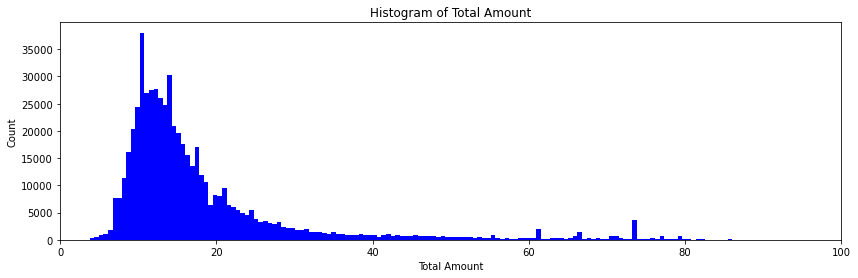

In [91]:
plt.figure(figsize=(14,4))
 
plt.hist(sample_train["total_amount"],1000,facecolor="blue")
plt.xlabel('Total Amount')
plt.ylabel('Count')
plt.title('Histogram of Total Amount')
plt.xlim(0,100);


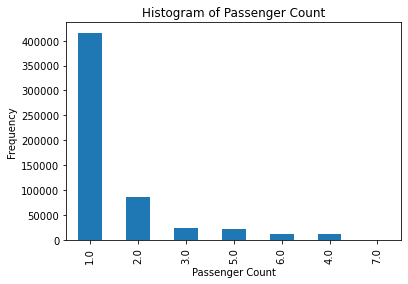

In [92]:
sample_train['passenger_count'].value_counts().plot.bar()
plt.title('Histogram of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency');

In [93]:
sample_train['passenger_count'].value_counts()

1.0    416046
2.0     86536
3.0     23018
5.0     20793
6.0     12236
4.0     11136
7.0         1
Name: passenger_count, dtype: int64

In [94]:
sample_val['passenger_count'].value_counts()

1.0    138355
2.0     28801
3.0      7705
5.0      6878
6.0      4100
4.0      3748
Name: passenger_count, dtype: int64

In [95]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569766 entries, 0 to 593722
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               569766 non-null  float64
 1   passenger_count        569766 non-null  float64
 2   trip_distance          569766 non-null  float64
 3   RatecodeID             569766 non-null  float64
 4   store_and_fwd_flag     569766 non-null  object 
 5   PULocationID           569766 non-null  int64  
 6   DOLocationID           569766 non-null  int64  
 7   payment_type           569766 non-null  float64
 8   fare_amount            569766 non-null  float64
 9   extra                  569766 non-null  float64
 10  mta_tax                569766 non-null  float64
 11  tip_amount             569766 non-null  float64
 12  tolls_amount           569766 non-null  float64
 13  improvement_surcharge  569766 non-null  float64
 14  total_amount           569766 non-nu

In [96]:
nyc = folium.Map(location=[40.730610, -73.935242],zoom_start=12)

In [97]:
#nyc

In [98]:
for i in sample_train.index[:100]:
    folium.CircleMarker(location=[sample_train['PULocation_lat'][i],sample_train['PULocation_lon'][i]], color='green').add_to(nyc)

In [99]:
#nyc

In [100]:
for i in sample_train.index[:100]:
    folium.CircleMarker(location=[sample_train['DOLocationID_lat'][i],sample_train['DOLocationID_lon'][i]], color='red').add_to(nyc)

In [101]:
#nyc

In [102]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [103]:
sample_train['distance'] = haversine_np(sample_train['PULocation_lon'],sample_train['PULocation_lat'],
                                    sample_train['DOLocationID_lon'],sample_train['DOLocationID_lat'] )

In [104]:
sample_val['distance'] = haversine_np(sample_val['PULocation_lon'],sample_val['PULocation_lat'],
                                    sample_val['DOLocationID_lon'],sample_val['DOLocationID_lat'] )

In [105]:
sample_train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
0,1.0,2.0,1.30,1.0,N,90,48,1.0,8.0,3.5,...,40.742279,-73.989845,40.762253,3,3,19,19,Evening,Evening,2.299277
1,2.0,5.0,1.31,1.0,N,90,48,1.0,9.0,1.0,...,40.742279,-73.989845,40.762253,4,4,19,19,Evening,Evening,2.299277
2,2.0,1.0,2.08,1.0,N,90,48,1.0,15.5,0.0,...,40.742279,-73.989845,40.762253,5,5,19,19,Evening,Evening,2.299277
3,2.0,2.0,2.15,1.0,N,90,48,1.0,8.0,0.5,...,40.742279,-73.989845,40.762253,3,3,5,5,Late night,Late night,2.299277
4,2.0,1.0,1.74,1.0,N,90,48,1.0,10.5,0.0,...,40.742279,-73.989845,40.762253,2,2,15,16,Afternoon,Evening,2.299277


In [106]:
sample_val.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
1,2.0,3.0,0.76,1.0,N,148,79,1.0,6.0,0.5,...,40.718938,-73.985937,40.72762,5,5,23,23,Late night,Late night,1.05128
2,2.0,1.0,0.57,1.0,N,148,79,2.0,5.0,0.0,...,40.718938,-73.985937,40.72762,5,5,15,15,Afternoon,Afternoon,1.05128
3,2.0,4.0,1.21,1.0,N,148,79,1.0,7.0,0.5,...,40.718938,-73.985937,40.72762,5,5,1,1,Late night,Late night,1.05128
4,2.0,2.0,0.90,1.0,N,148,79,1.0,5.5,0.5,...,40.718938,-73.985937,40.72762,2,2,0,0,Late night,Late night,1.05128
5,1.0,1.0,0.90,1.0,N,148,79,1.0,5.0,3.0,...,40.718938,-73.985937,40.72762,3,3,2,2,Late night,Late night,1.05128


/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance'>

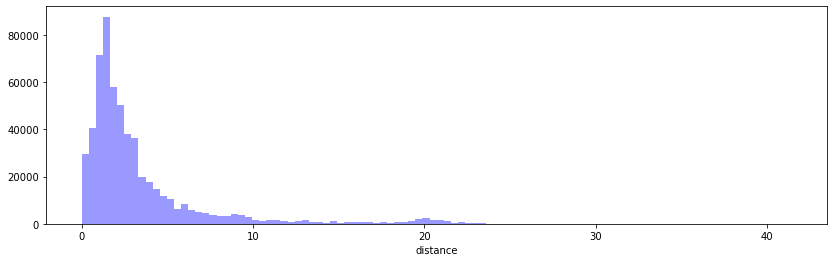

In [107]:
plt.figure(figsize=(14,4))
sns.distplot(sample_train['distance'], bins=100, color='blue', kde=False)

In [108]:
sample_train['distance'].describe()

count    569766.000000
mean          3.317884
std           3.900134
min           0.000000
25%           1.247601
50%           2.044180
75%           3.655133
max          41.445157
Name: distance, dtype: float64

In [109]:
sample_train = sample_train.loc[sample_train['distance'] > 0]

In [110]:
sample_val = sample_val.loc[sample_val['distance'] > 0]

540559
540559


<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

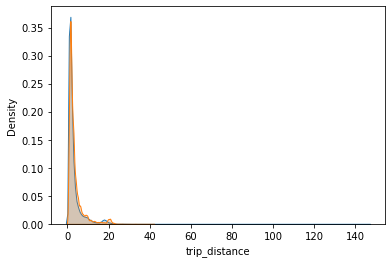

In [111]:
comparison_column = pd.Series(np.where(sample_train["trip_distance"] == sample_train["distance"], True, False))
print((comparison_column==True).count())
print((comparison_column==False).count())
comparison_column
sns.kdeplot(data=sample_train['trip_distance'],label = "trip_distance",shade=True )
sns.kdeplot(data=sample_train['distance'],label = "distance",shade=True )

In [112]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
0,1.0,2.0,1.30,1.0,N,90,48,1.0,8.0,3.5,...,40.742279,-73.989845,40.762253,3,3,19,19,Evening,Evening,2.299277
1,2.0,5.0,1.31,1.0,N,90,48,1.0,9.0,1.0,...,40.742279,-73.989845,40.762253,4,4,19,19,Evening,Evening,2.299277
2,2.0,1.0,2.08,1.0,N,90,48,1.0,15.5,0.0,...,40.742279,-73.989845,40.762253,5,5,19,19,Evening,Evening,2.299277
3,2.0,2.0,2.15,1.0,N,90,48,1.0,8.0,0.5,...,40.742279,-73.989845,40.762253,3,3,5,5,Late night,Late night,2.299277
4,2.0,1.0,1.74,1.0,N,90,48,1.0,10.5,0.0,...,40.742279,-73.989845,40.762253,2,2,15,16,Afternoon,Evening,2.299277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593718,2.0,1.0,21.50,1.0,N,249,109,2.0,66.0,1.0,...,40.734576,-74.150890,40.551863,4,4,18,19,Evening,Evening,23.833088
593719,2.0,1.0,21.45,1.0,N,114,109,1.0,64.0,0.5,...,40.728340,-74.150890,40.551863,4,4,0,1,Late night,Late night,23.497928
593720,2.0,1.0,31.09,1.0,N,158,204,2.0,94.0,0.5,...,40.735035,-74.207826,40.540334,4,4,0,1,Late night,Late night,27.372961
593721,2.0,1.0,27.23,1.0,N,246,204,2.0,72.0,0.0,...,40.753309,-74.207826,40.540334,0,0,18,19,Evening,Evening,29.247575


In [113]:
sample_val

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PULocation_lat,DOLocationID_lon,DOLocationID_lat,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
1,2.0,3.0,0.76,1.0,N,148,79,1.0,6.0,0.5,...,40.718938,-73.985937,40.727620,5,5,23,23,Late night,Late night,1.051280
2,2.0,1.0,0.57,1.0,N,148,79,2.0,5.0,0.0,...,40.718938,-73.985937,40.727620,5,5,15,15,Afternoon,Afternoon,1.051280
3,2.0,4.0,1.21,1.0,N,148,79,1.0,7.0,0.5,...,40.718938,-73.985937,40.727620,5,5,1,1,Late night,Late night,1.051280
4,2.0,2.0,0.90,1.0,N,148,79,1.0,5.5,0.5,...,40.718938,-73.985937,40.727620,2,2,0,0,Late night,Late night,1.051280
5,1.0,1.0,0.90,1.0,N,148,79,1.0,5.0,3.0,...,40.718938,-73.985937,40.727620,3,3,2,2,Late night,Late night,1.051280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197816,2.0,1.0,17.21,1.0,N,88,156,2.0,54.0,1.0,...,40.703358,-74.167235,40.631308,0,0,18,19,Evening,Evening,15.374804
197818,1.0,1.0,20.80,1.0,N,138,221,1.0,56.0,0.5,...,40.774376,-74.073704,40.618769,3,4,23,0,Late night,Late night,24.148643
197819,2.0,1.0,21.80,1.0,N,138,221,2.0,59.0,0.0,...,40.774376,-74.073704,40.618769,4,4,11,12,Morning,Afternoon,24.148643
197820,2.0,1.0,23.91,1.0,N,95,221,1.0,67.0,0.0,...,40.721432,-74.073704,40.618769,4,4,11,12,Morning,Afternoon,22.206108


The most visited area is : [236]


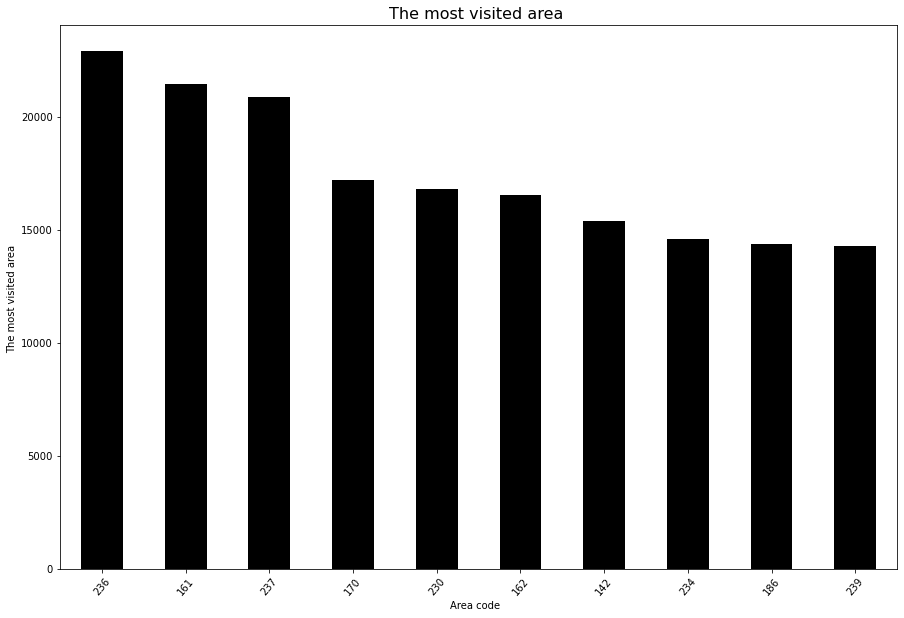

In [114]:
#Q1 :   
n = 1
most_famous_Location= sample_train['DOLocationID'].value_counts()[:n].index.tolist()
print('The most visited area is :',most_famous_Location)
# visulatiziton Q1 :
m=10
plt.figure(figsize=(15,10))
sample_train['DOLocationID'].value_counts()[:m].plot.bar(color ='black')
plt.xticks(rotation=50)
plt.xlabel("Area code  ")
plt.ylabel("The most visited area ")
plt.title('The most visited area ', fontsize=16)
plt.show();


The most requested day for trips is : [4]


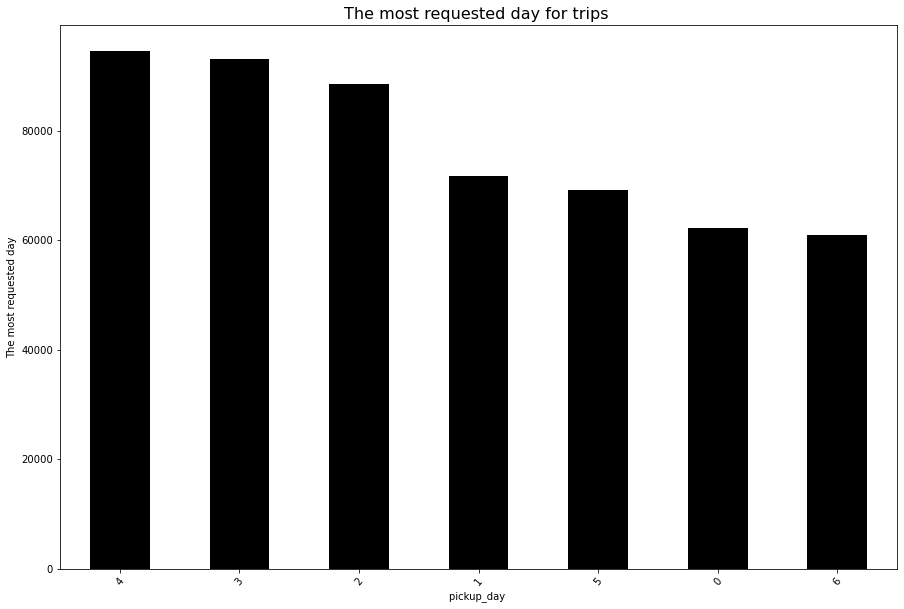

In [115]:
# Q2 
n=1
most_requested_day= sample_train['pickup_day_no'].value_counts()[:n].index.tolist()
print('The most requested day for trips is :',most_requested_day)
# visulatiziton Q2 :
plt.figure(figsize=(15,10))
sample_train['pickup_day_no'].value_counts().plot.bar(color ='black')
plt.xticks(rotation=50)
plt.xlabel("pickup_day ")
plt.ylabel("The most requested day")
plt.title('The most requested day for trips ', fontsize=16)
plt.show();


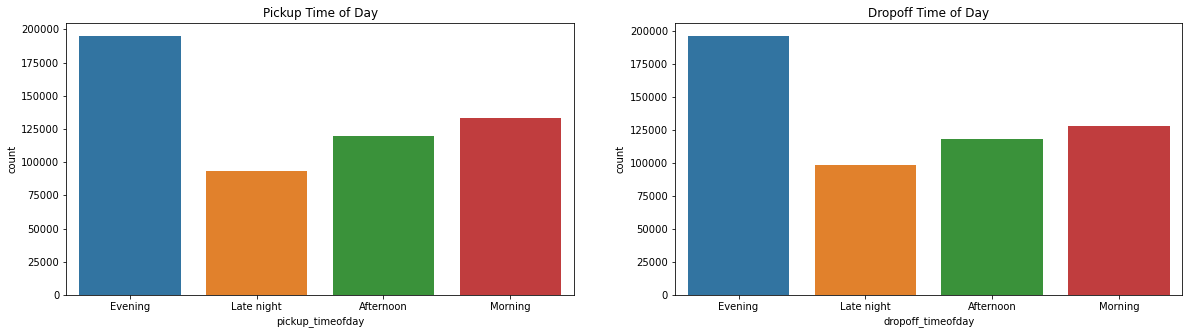

In [116]:
# Q3 :  
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=sample_train,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=sample_train,ax=ax4)
#visulatiziton Q3


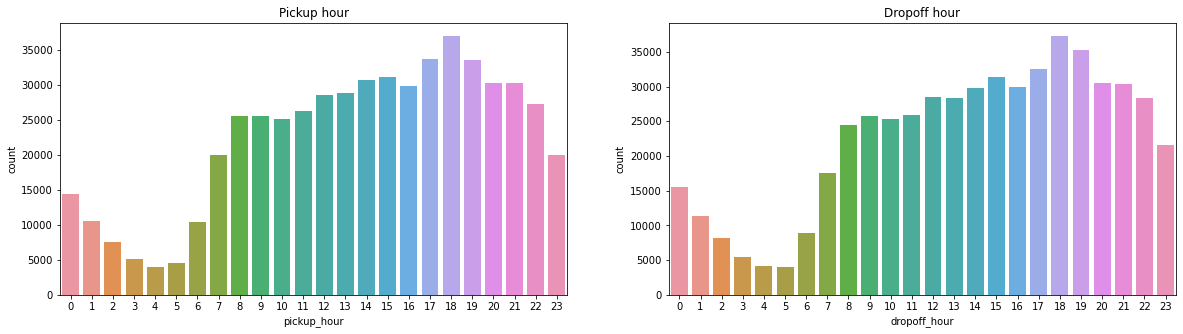

In [117]:
# Q4:                                                                                          
# visulatiziton Q4
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup hour')
ax=sns.countplot(x="pickup_hour",data=sample_train,ax=ax9)
ax10.set_title('Dropoff hour')
ax=sns.countplot(x="dropoff_hour",data=sample_train,ax=ax10)


The Most used payment method is : [1.0, 2.0, 3.0, 4.0]


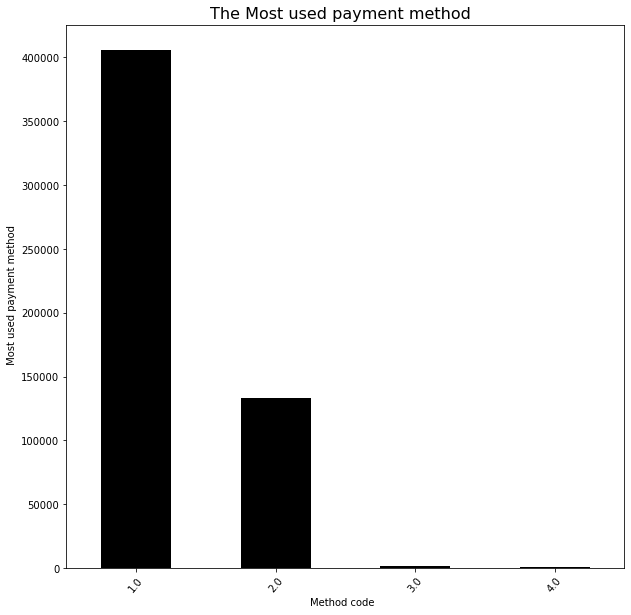

In [118]:

# Q5 : 
n=4.0
#ML_data=ML_data.sample() # هنا يوم كنت اشتغل على اداتا كاملة كان يطلع لي ايرور
Most_payment_method= sample_train['payment_type'].value_counts()[:n].index.tolist()
print('The Most used payment method is :',Most_payment_method)
plt.figure(figsize=(10,10))
sample_train['payment_type'].value_counts().plot.bar(color ='black')
plt.xticks(rotation=50)
plt.xlabel("Method code  ")
plt.ylabel(" Most used payment method")
plt.title('The Most used payment method  ', fontsize=16)
plt.show();


In [119]:

sample_train2= sample_train.copy()

In [120]:
sample_train.pickup_day_no.unique()

array([3, 4, 5, 2, 0, 6, 1])

In [121]:
sample_train.shape

(540559, 27)

In [122]:
sample_train['work_day']=sample_train.pickup_day_no.replace(to_replace=[0,1 ,2,3,4,5,6], value=[1,1,1,1,1,0,0])

<ipython-input-122-e30a92cb5123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train['work_day']=sample_train.pickup_day_no.replace(to_replace=[0,1 ,2,3,4,5,6], value=[1,1,1,1,1,0,0])


In [123]:
sample_val['work_day']=sample_val.pickup_day_no.replace(to_replace=[0,1 ,2,3,4,5,6], value=[1,1,1,1,1,0,0])

In [124]:
sample_train['work_day']

0         1
1         1
2         0
3         1
4         1
         ..
593718    1
593719    1
593720    1
593721    1
593722    1
Name: work_day, Length: 540559, dtype: int64

In [125]:
sample_train['work_hour']=sample_train.pickup_hour.replace(to_replace=[7,8,9,16,17,18,19,1,2,3,4,5,6,10,11,12,13,14,15,20,21,22,23], 
                                 value=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

<ipython-input-125-1f6dd5cdb4d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train['work_hour']=sample_train.pickup_hour.replace(to_replace=[7,8,9,16,17,18,19,1,2,3,4,5,6,10,11,12,13,14,15,20,21,22,23],


In [126]:
sample_val['work_hour']=sample_val.pickup_hour.replace(to_replace=[7,8,9,16,17,18,19,1,2,3,4,5,6,10,11,12,13,14,15,20,21,22,23], 
                                 value=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [127]:
sample_train['work_hour'].unique()

array([1, 0])

In [128]:
sample_train.pickup_hour.unique()

array([19,  5, 15, 23, 20, 14, 12,  1, 16,  0, 22,  9,  4,  2, 18, 13, 17,
       10,  7, 21,  3,  8, 11,  6])

correletion 

In [129]:
#sns.pairplot(sample_train[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

<AxesSubplot:>

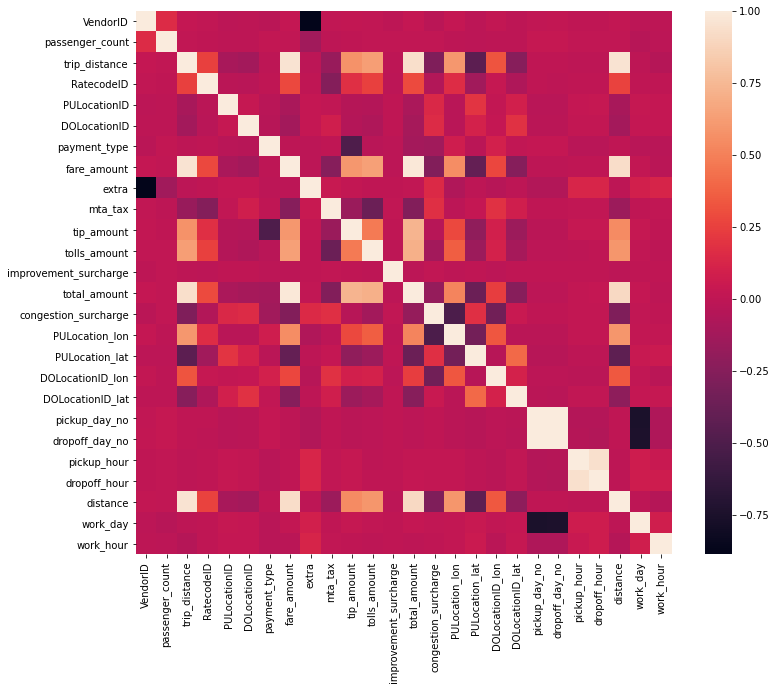

In [130]:
plt.figure(figsize=(12, 10))
sns.heatmap(sample_train.corr())

In [131]:
df_num_corr = sample_train.corr()['fare_amount'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with SalePrice:
fare_amount       1.000000
total_amount      0.978375
trip_distance     0.959751
distance          0.927249
tolls_amount      0.637297
tip_amount        0.599313
PULocation_lon    0.552335
Name: fare_amount, dtype: float64


In [132]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540559 entries, 0 to 593722
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               540559 non-null  float64
 1   passenger_count        540559 non-null  float64
 2   trip_distance          540559 non-null  float64
 3   RatecodeID             540559 non-null  float64
 4   store_and_fwd_flag     540559 non-null  object 
 5   PULocationID           540559 non-null  int64  
 6   DOLocationID           540559 non-null  int64  
 7   payment_type           540559 non-null  float64
 8   fare_amount            540559 non-null  float64
 9   extra                  540559 non-null  float64
 10  mta_tax                540559 non-null  float64
 11  tip_amount             540559 non-null  float64
 12  tolls_amount           540559 non-null  float64
 13  improvement_surcharge  540559 non-null  float64
 14  total_amount           540559 non-nu

x,y >> sample_train 

In [133]:
sample_train.extra.unique()

array([3.5, 1. , 0. , 0.5, 3. , 2.5, 0.8, 7. , 4.5, 1.3, 1.8, 0.3, 5.3])

In [134]:
sample_train.mta_tax.unique()

array([0.5, 0. , 3.3])

In [135]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540559 entries, 0 to 593722
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               540559 non-null  float64
 1   passenger_count        540559 non-null  float64
 2   trip_distance          540559 non-null  float64
 3   RatecodeID             540559 non-null  float64
 4   store_and_fwd_flag     540559 non-null  object 
 5   PULocationID           540559 non-null  int64  
 6   DOLocationID           540559 non-null  int64  
 7   payment_type           540559 non-null  float64
 8   fare_amount            540559 non-null  float64
 9   extra                  540559 non-null  float64
 10  mta_tax                540559 non-null  float64
 11  tip_amount             540559 non-null  float64
 12  tolls_amount           540559 non-null  float64
 13  improvement_surcharge  540559 non-null  float64
 14  total_amount           540559 non-nu

In [214]:
x=sample_train[['congestion_surcharge','distance','pickup_day_no','pickup_hour','work_day','work_hour']]

In [215]:
X_train,y_train = x, sample_train['fare_amount']

In [216]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [139]:
#preds = lr_model.predict(X_train) 
#sns.jointplot(x=preds,y=y_train, kind='reg')

In [217]:
lr_model.score(X_train,y_train)

0.8605695483385128

In [218]:
list(zip(lr_model.coef_, x.columns))

[(-0.14675910206175177, 'congestion_surcharge'),
 (2.469611656214863, 'distance'),
 (0.07600693757246493, 'pickup_day_no'),
 (-0.0009772798898036517, 'pickup_hour'),
 (0.7142219099318852, 'work_day'),
 (0.3274582916305944, 'work_hour')]

xx,yy >> sample_val 

In [256]:
xx=sample_val[['congestion_surcharge','distance','pickup_day_no','pickup_hour','work_day','work_hour']]

In [257]:
X_val,y_val = xx, sample_val['fare_amount']

In [258]:
lr_model.score(X_val,y_val)

0.8686350842569361

In [155]:
#X2.drop('congestion_surcharge_pol', axis=1, inplace=True)
#X2.drop('pickup_day_no_pol', axis=1, inplace=True)

total amount

In [259]:
sample_train.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'PULocation_lon', 'PULocation_lat', 'DOLocationID_lon',
       'DOLocationID_lat', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_timeofday', 'dropoff_timeofday', 'distance',
       'work_day', 'work_hour'],
      dtype='object')

In [260]:
x_total=sample_train[['congestion_surcharge','distance','pickup_day_no','pickup_hour','work_day','work_hour','extra',
                     'improvement_surcharge','mta_tax']]

In [261]:
X_train_total,y_train_total = x_total, sample_train['total_amount']

In [262]:
lr_model_total = LinearRegression()
lr_model_total.fit(X_train_total, y_train_total)

LinearRegression()

In [263]:
lr_model_total.score(X_train_total, y_train_total)

0.8452043842534125

In [264]:
x_total_val=sample_val[['congestion_surcharge','distance','pickup_day_no','pickup_hour','work_day','work_hour','extra',
                     'improvement_surcharge','mta_tax']]

In [265]:
X_train_total_val,y_train_total_val = x_total_val, sample_val['total_amount']

In [266]:
lr_model_total.score(X_train_total_val,y_train_total_val)

0.8468311723256529

(1) adding polynomial terms 

In [246]:
X2 = X_train.copy()

In [247]:
X2['work_day'] = X2['work_day']* (1000)
X2['work_hour'] = X2['work_hour']* (1000)

In [251]:
X2['congestion_surcharge'] = X2['congestion_surcharge']* (-1)
X2['pickup_day_no'] = X2['pickup_day_no']* (-1)

In [252]:
lr_model = LinearRegression()
lr_model.fit(X2, y_train)
val_score = lr_model.score(X2, y_train)

In [253]:
val_score

0.8605695483385128

In [254]:
list(zip(lr_model.coef_, X2.columns))

[(0.14675910206168988, 'congestion_surcharge'),
 (2.469611656214896, 'distance'),
 (-0.07600693757239431, 'pickup_day_no'),
 (-0.0009772798898030274, 'pickup_hour'),
 (0.0007142219099314118, 'work_day'),
 (0.0003274582916299075, 'work_hour')]

In [239]:
X2.head()

,congestion_surcharge,distance,pickup_day_no,pickup_hour,work_day,work_hour
0,2.5,2.299277,3,19,10,10
1,2.5,2.299277,4,19,10,10
2,2.5,2.299277,5,19,0,10
3,2.5,2.299277,3,5,10,0
4,2.5,2.299277,2,15,10,0


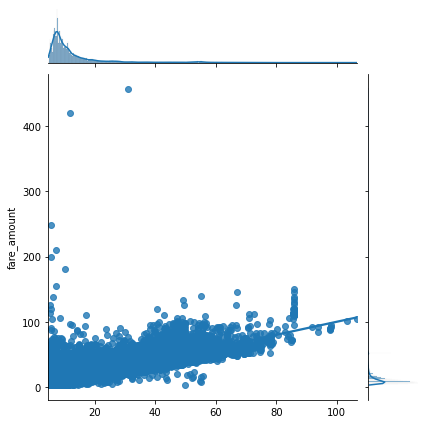

In [172]:
preds = lr_model.predict(X2) 
sns.jointplot(x=preds,y=y_train, kind='reg')

(array([62252., 71715.,     0., 88622., 93209.,     0., 94611.,     0.,
        69238., 60912.]),
 array([-1.61626162, -1.2924132 , -0.96856477, -0.64471634, -0.32086791,
         0.00298052,  0.32682895,  0.65067737,  0.9745258 ,  1.29837423,
         1.62222266]),
 <BarContainer object of 10 artists>)

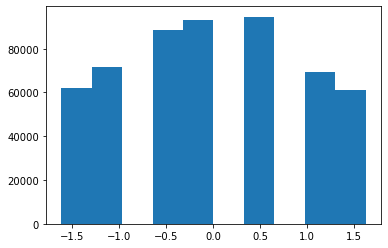

In [151]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)
X_val = std.transform(X_val.values)


## Apply the scaler to the test set

#X_te = std.transform(X_test.values)
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_train), type(X_tr)
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)

plt.hist(X_tr[:,2])

In [152]:
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_tr.values)
X_val_poly = poly.transform(X_val.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

print( lm_poly.score(X_train_poly, y_train))
print( lm_poly.score(X_val_poly, y_val))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_val.values)
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_vl = std.transform(X_val.values)
## Apply the scaler to the test set

#X_te = std.transform(X_test.values)
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_val), type(X_vl)
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)

plt.hist(X_vl[:,2])

In [ ]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X_tr, y_train) #fit model to our choice of features

In [ ]:
lm.score(X_tr, y_train)

In [ ]:
lm.score(X_val,y_val)

In [ ]:
preds = lm.predict(X_tr) # generate predictions (on training data) using fit model

In [ ]:

#def RMSE(actuals, preds): #root mean squared error
  #     return np.sqrt(np.mean((actuals - preds)**2))

#RMSE(X_val,y_val)

In [ ]:
data_weather = pd.read_csv('weather20201.csv')

In [ ]:
data_weather

In [ ]:

data_weather.rename(columns={'DATEday': 'pickup_day_no'}, inplace=True)
data_weather

In [ ]:
sample_train = pd.merge(sample_train,data_weather, on='pickup_day_no')
sample_train

In [ ]:
sample_train.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
sample_train

In [ ]:
sample_val = pd.merge(sample_val,data_weather, on='pickup_day_no')
sample_val

In [ ]:
sample_val.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
sample_val

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(sample_train.corr())

In [ ]:
df_num_corr = sample_train.corr()['fare_amount'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))